# Task 1 - Prediction using Supervised ML

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Muhammed Sabah

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns


In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
main_data = pd.read_csv(url)
print("Data imported successfully")

main_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
##checking for null values

main_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

no null values

In [9]:
print(main_data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


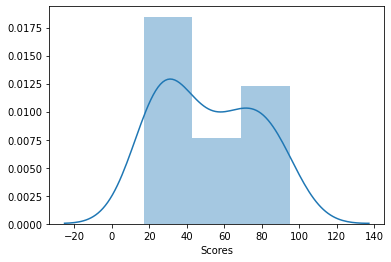

In [10]:
sns.distplot(main_data['Scores'])

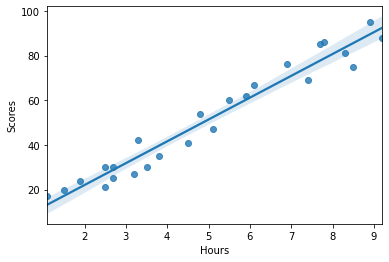

In [11]:
sns.regplot(x= main_data['Hours'], y = main_data['Scores'] )

shows marks is linearly correlated to scores

## Preparing data

In [12]:
X = main_data.iloc[:, :-1].values  
y = main_data.iloc[:, 1].values 

In [62]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

## Trianing the Algorithm 

we are using Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
#creating an instance for KNNClassifier
ln = LinearRegression()


In [65]:
#fitting Model
ln.fit(X_train, y_train)

LinearRegression()

## Predicting

In [66]:
prediction = ln.predict(X_test)

In [67]:
## comparing actual and predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})  
print(df)

   Actual  Predicted
0      20  17.053665
1      27  33.694229
2      69  74.806209
3      30  26.842232
4      62  60.123359
5      35  39.567369
6      24  20.969092
7      86  78.721636


### Computing MSE ,RMSE and Mean Absolute Error for Evaluation

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [69]:
ln_mse = mean_squared_error(y_test,prediction)
ln_rmse = np.sqrt(ln_mse)
ln_mae = mean_absolute_error(y_test,prediction)

In [70]:
print('Mean squared error = ',ln_mse)
print('root mean squared error = ',ln_rmse)
print('mean absolute error = ',ln_mae)

Mean squared error =  22.96509721270043
root mean squared error =  4.792191274636315
mean absolute error =  4.419727808027652


## regression diagnostics - Residual plot analysis

In [71]:
residual = y_test - prediction

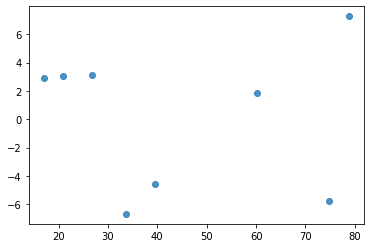

In [72]:
sns.regplot(x = prediction,y = residual , scatter = True , fit_reg = False , data = main_data)

In [73]:
## kind of near to zero means good model , need more data for a good trained model...